# Importing libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
# input sequence length
sequence_length = 4
# batch size
batch_size = 1
# input dim
input_dim = 512
# output dim
d_model = 512
# random sampled input
x = torch.randn((batch_size), sequence_length, input_dim)

In [3]:
x.size()

torch.Size([1, 4, 512])

In [4]:
qkv_layer = nn.Linear(input_dim, 3*d_model)

In [5]:
qkv = qkv_layer(x)

### Shape

- 1 - batch

- 4 - Input word

- 1536 - Size

In [6]:
qkv.shape

torch.Size([1, 4, 1536])

# Plotting

Text(0.5, 1.0, 'qkv distribution')

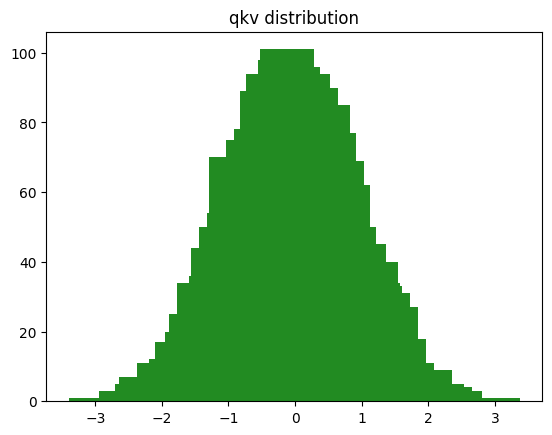

In [8]:
y_val = torch.histc(qkv, bins=200, min=3, max=3)
x_val = np.arange(-1,1,0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [9]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3* head_dim)

In [10]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [12]:
qkv = qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 4, 192])

In [15]:
q, k, v = qkv.chunk(3, dim=-1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

# Self-Attention of multiple heads

In [19]:
d_k = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2,-1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])